## **Importing Required Libraries**

In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **Importing Data**

In [436]:
data=pd.read_csv('/Users/aungkhant/Desktop/AIT/ML/Cars.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## **Data Cleaning**

Mapping Owners

In [437]:
owner_mapping = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5
}
data['owner'] = data['owner'].map(owner_mapping)

Removing rows related to CNG and LPG cars

In [438]:
data = data[~data['fuel'].isin(['CNG', 'LPG'])]

Removing 'kmpl' from mileage and converting to float

In [439]:
data['mileage'] = data['mileage'].str.replace(' kmpl', '').astype(float)

Removing 'CC' from engine and converting to float

In [440]:
data['engine'] = data['engine'].str.replace(' CC', '').astype(float)

Removing 'bhp' from max_power and converting to float

In [441]:
data['max_power'] = data['max_power'].str.replace(' bhp', '').astype(float)

Extracting only first word for brand

In [442]:
data.rename(columns={'name': 'brand'},inplace=True)
data['brand'] = data['brand'].str.split(' ').str.get(0)

Removing torque column

In [443]:
data = data.drop('torque', axis=1)

Removing rows related to 'Test Drive Car'

In [444]:
data = data[data['owner'] != 5]

Checking data frame again

In [445]:
data.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [446]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


Checking Missing Values

In [447]:
print(data.isnull().sum())

brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64


## **Exploratory Data Analysis**

### **1. Correlation Heat Map**
I want to explore how each features related to each other, most importantly how they relate to the selling price.

To achieve this, we need to treat the catagorical variables of 'brand', 'fuel', 'seller_type' and 'transmission', which are not compatible with data.corr() method. Clean and efficient way is encoding these values into numerical values using LabelEncoder.

In [448]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['brand', 'fuel', 'seller_type', 'transmission']:
    data[col] = le.fit_transform(data[col])

print(data.head())

   brand  year  selling_price  km_driven  fuel  seller_type  transmission  \
0     20  2014         450000     145500     0            1             1   
1     27  2014         370000     120000     0            1             1   
2     10  2006         158000     140000     1            1             1   
3     11  2010         225000     127000     0            1             1   
4     20  2007         130000     120000     1            1             1   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0  


<Axes: >

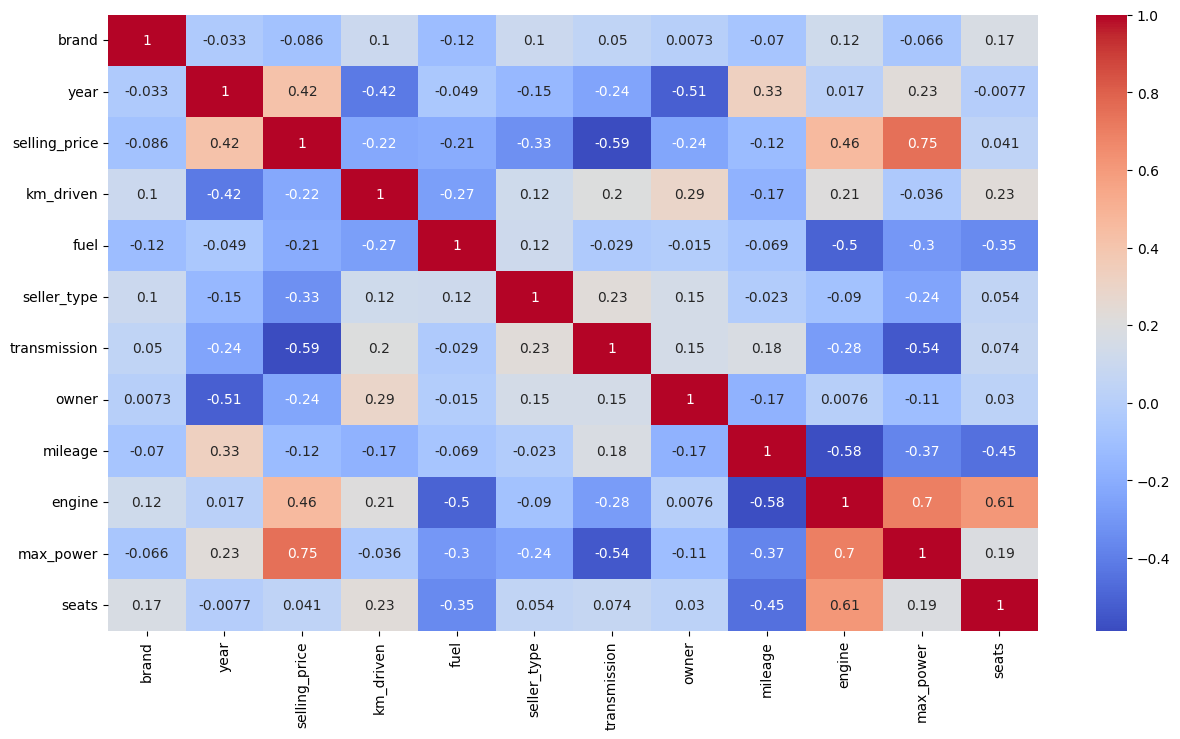

In [449]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

<span style="color:red">Conclusion from Heat Map</span>

From the heat map, we can conclude that max_power(0.75) and engine(0.46) have strong positive correlation with selling_price. It is obvious that cars with higher power generally cost more.

Transmission(-0.59) has deep negative correlation with selling_price. Manual cars are cheaper compared to automatic ones.

seats, brand, and owner have weak correlations with selling_price, indicating limited influence on car price.

### **2. Checking Outliers**
I want to check for unusually high or low values in max_power and engine.

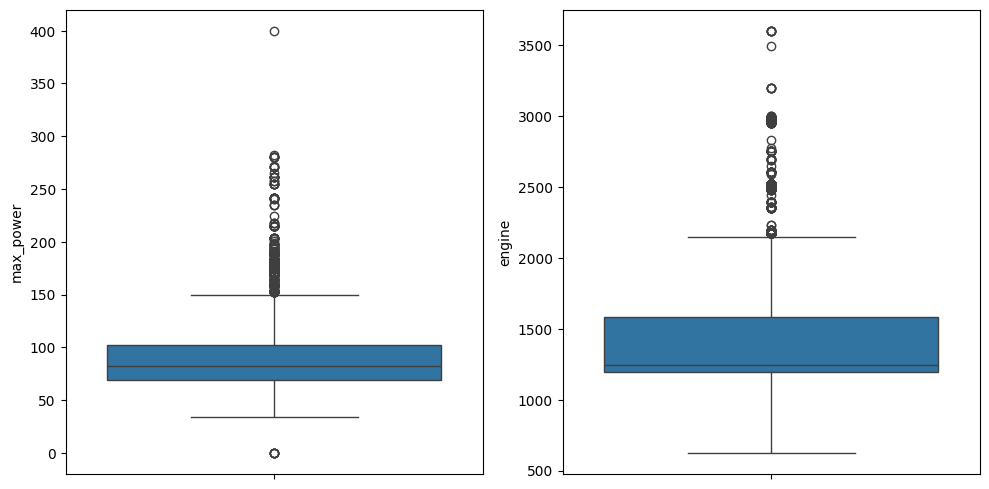

In [450]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data['max_power'], ax=axes[0])

sns.boxplot(data['engine'], ax=axes[1])

plt.tight_layout()
plt.show()

<span style="color:red">Conclusion from Outliers</span>

As we can see, there are a lot of outliers in these two features. These might correspond to specific car types (e.g., trucks, high-end SUVs).

Outliers can significantly affect the model as they distort the relationship between the feature and selling_price.(Especially for regression models)

Let's compare it to km_driven outliers.

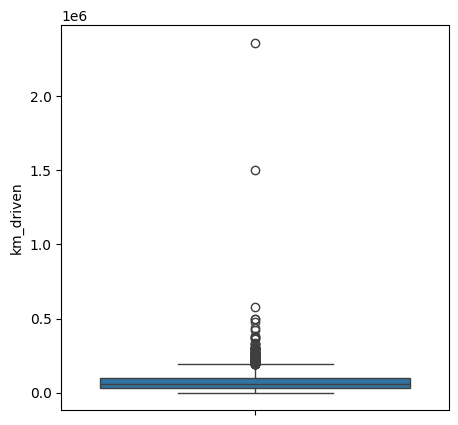

In [451]:
plt.figure(figsize=(5,5)) #I want to see as the same dimension as former boxplots
sns.boxplot(data['km_driven'])
plt.show()

The boxplot tell us that km_driven factor appears to have fewer extreme outliers compared to the max_power and engine factors

### **3. Scatter Plot**
I want to see the relationship between transmission(Auto or manual) and selling_price of the cars over the years.

<Axes: xlabel='year', ylabel='selling_price'>

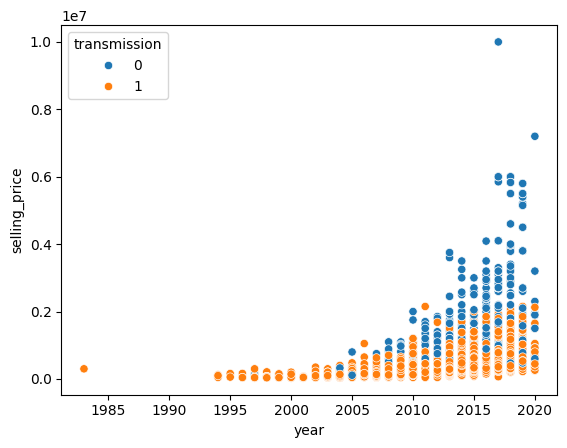

In [452]:
sns.scatterplot(x = data.year, y = data.selling_price, hue = data.transmission)

<span style="color:red">Conclusion from Scatter Plots</span>

The plot shows two types of transmission, labeled 0(Manual) and 1(Auto)

Cars from before 2000 have relatively low selling prices, regardless of transmission type. This is likely due to depreciation over time as cars age.
The year(Model) feature shows a strong trend, suggesting it’s a critical factor in determining the selling price.

The plot also tells us that manual cars retain their value better over time compared to automatic cars, or it could reflect the local market’s preference for manual cars.

To be notice, there are a few cars with extremely high selling_price (e.g., around 2015–2020) that stand out from the rest. These could be luxury cars or specialized models.

### **4. Histogram**
Let's see the histogram of transmission feature for additional confirmation.


In [453]:
# Checking max and min for km_driven distribution plot
print("Minimum km_driven:", data['km_driven'].min())
print("Maximum km_driven:", data['km_driven'].max())

Minimum km_driven: 1000
Maximum km_driven: 2360457


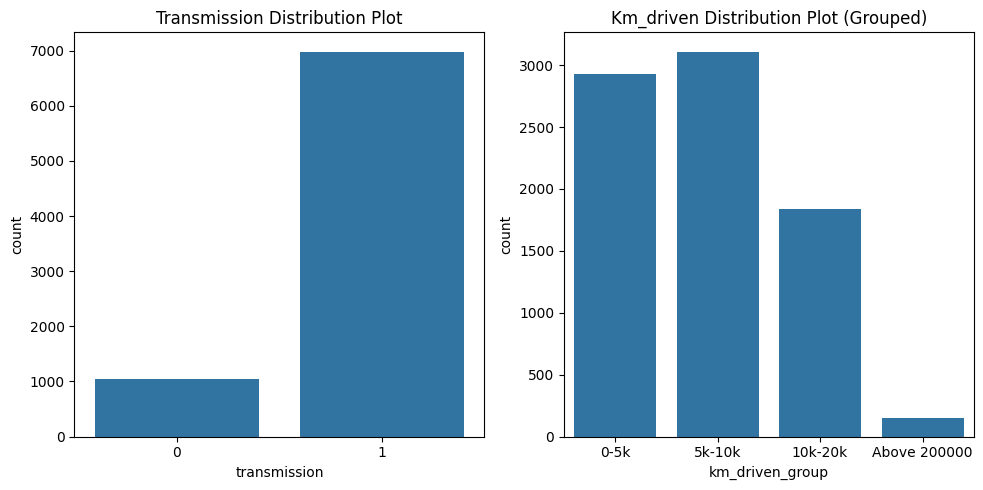

In [454]:
# Creating range groups 
bins = [0, 50000, 100000, 200000, float('inf')]
labels = ['0-5k', '5k-10k', '10k-20k', 'Above 200000']
data['km_driven_group'] = pd.cut(data['km_driven'], bins=bins, labels=labels, right=False)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=data, x='transmission', ax=axes[0])
axes[0].set_title('Transmission Distribution Plot')

sns.countplot(data=data, x='km_driven_group', ax=axes[1])
axes[1].set_title('Km_driven Distribution Plot (Grouped)')

plt.tight_layout()
plt.show()

<span style="color:red">Conclusion from transmission and km_driven Distribution</span>

The histograms shows us that one transmission type (Auto) dominates the dataset. The dataset might be biased and transmission may have a lower impact on price prediction since there is less variation.

A large portion of the dataset consists of newer or lightly used cars. Very few cars fall into the “Above 200,000 km” category, meaning extreme high-mileage cars are rare and could be considered outliers.

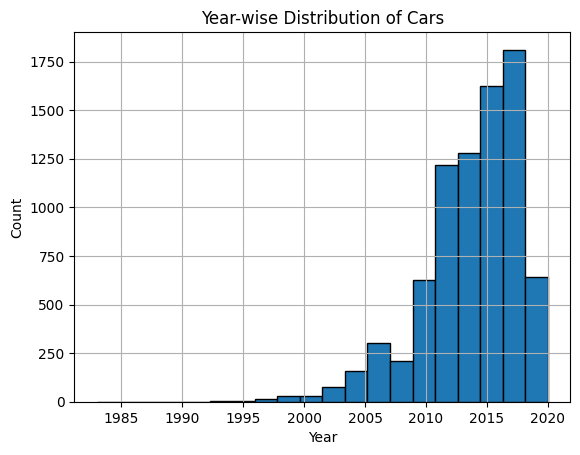

In [455]:
data['year'].hist(bins=20, edgecolor='black')
plt.title('Year-wise Distribution of Cars')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<span style="color:red">Conclusion from Year-wise Distribution</span>

Since the dataset contains mostly newer cars, the model might perform better at predicting prices for recent cars but struggle for very old cars.
If older car data is limited, the model might not learn accurate depreciation trends for cars older than 2005.

### **Feature Selection**
My selection would be "year", "km_driven" and "max_power": "year" (aka Model) is a strong indicator of depreciation, "km_driven" reflects car usage, and "max_power" (aka break horsepower) captures the vehicle’s performance capability.

## **Data Preparation for Training Model**

### **Preparing Training Data**

In [456]:
X = data[['year', 'km_driven', 'max_power']]  # Selected features
y = data['selling_price']  # Target variable

### **Dealing with missing values(NULL)**

checking missing values

In [457]:
print(f"X missing values: \n{X[['year', 'km_driven', 'max_power']].isna().sum()}")
print(f"y missing values: \n{y.isna().sum()}")

X missing values: 
year           0
km_driven      0
max_power    208
dtype: int64
y missing values: 
0


Only max_power has missing values, thus why I'd like to fill with median values

In [ ]:
X['max_power'].fillna(X['max_power'].median(), inplace=True)
X['max_power'].isna().sum()

### **Dealing with Outliers**

Checking Outliers

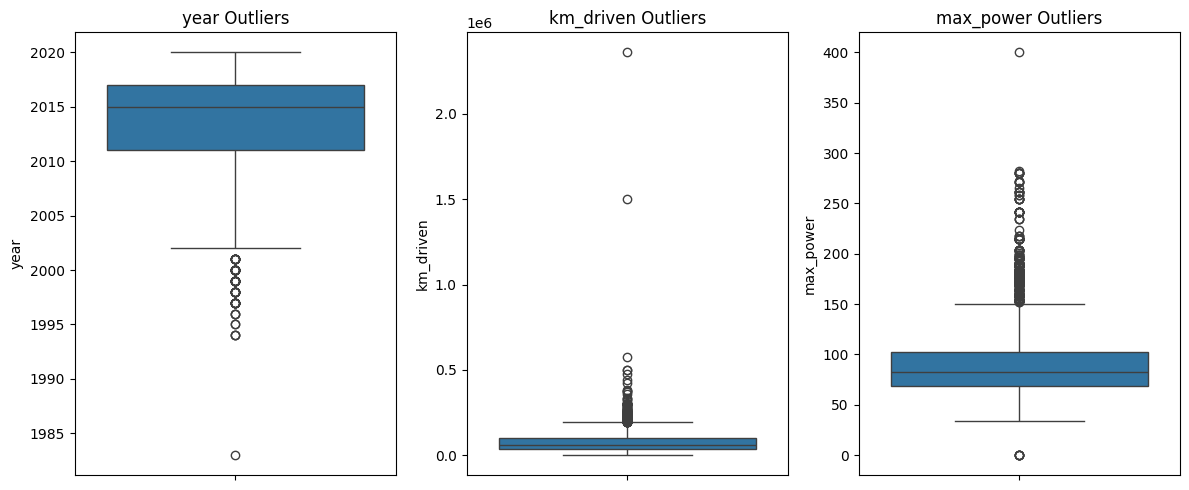

In [459]:
plt.figure(figsize=(12, 5))

for i, col in enumerate(X.columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=X[col])
    plt.title(f"{col} Outliers")

plt.tight_layout()
plt.show()

 Detect Outliers Using Interquatile Range (IQR Method)

In [460]:
# Compute IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Checking how many outliers exist per column
print(((X < lower_bound) | (X > upper_bound)).sum())

year          78
km_driven    168
max_power    582
dtype: int64


Removing Outliers

In [461]:
mask = ~((X < lower_bound) | (X > upper_bound)).any(axis=1)
X_clean = X[mask].copy()
y_clean = y[mask].copy()

### **Applying Log transformation for y**

In [462]:
y_clean = np.log1p(y_clean)

### **Preprocessing**

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

### **Normalizing features using StandardScaler**

In [464]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Linear Regression Model**

Training Model

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

Making Predictions

In [466]:
y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # Reverse log transformation
y_test_actual = np.expm1(y_test)  # Reverse test values

Evaluating Model Performance

In [467]:
mae = mean_absolute_error(y_test_actual, y_pred)
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 107660.08485737292
Mean Squared Error (MSE): 30576363163.01959
Root Mean Squared Error (RMSE): 174860.98239178341
R² Score: 0.6976435036699162


Visualization Results

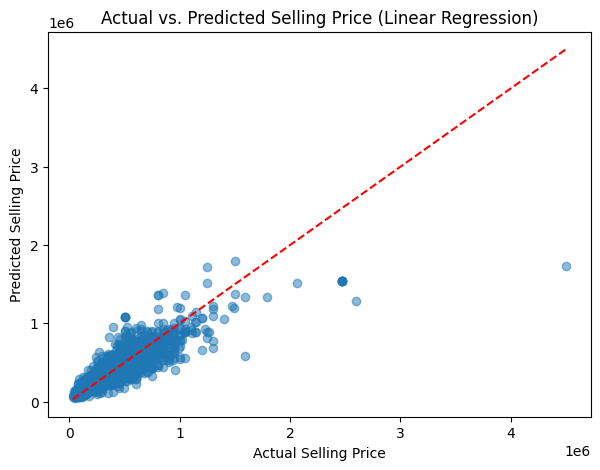

In [468]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test_actual, y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price (Linear Regression)")
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color='red', linestyle='--')
plt.show()

## **Random Forest Regressor Model**

Training Model

In [469]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

Making Prediction

In [470]:
y_pred_rf_log = rf_model.predict(X_test_scaled)
y_pred_rf = np.expm1(y_pred_rf_log)
y_test_actual = np.expm1(y_test)

Evaluating Performance

In [471]:
mae_rf = mean_absolute_error(y_test_actual, y_pred_rf)
mse_rf = mean_squared_error(y_test_actual, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_actual, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R² Score: {r2_rf}")

Random Forest MAE: 68158.52839416981
Random Forest MSE: 11068109428.131674
Random Forest RMSE: 105205.08271054053
Random Forest R² Score: 0.8905522291893994


Visualization Results

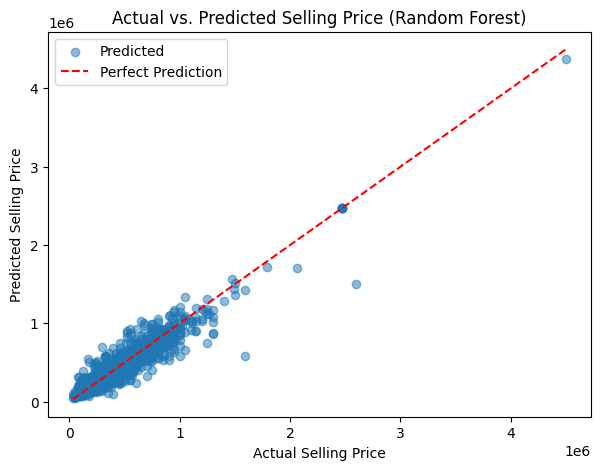

In [472]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(7, 5))
plt.scatter(y_test_actual, y_pred_rf, alpha=0.5, label="Predicted")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price (Random Forest)")

# Add Perfect Prediction Line
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], 
         color='red', linestyle='--', label="Perfect Prediction")

plt.legend()
plt.show()

## **Inference**

Saving the model.

In [473]:
import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Load Model

In [474]:
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

Preparing New Data for Prediction

In [475]:
import pandas as pd

new_data = pd.DataFrame({
    'year': [2018],         
    'km_driven': [45000],  
    'max_power': [110]      
})

Scaling Numerical Features

In [476]:
new_data_scaled = scaler.transform(new_data)

Making Prediction

In [478]:
predicted_price_log = model.predict(new_data_scaled)
predicted_price = np.expm1(predicted_price_log)
print(f"Predicted Selling Price: {predicted_price[0]:,.2f}")

Predicted Selling Price: 742,195.71


## **Assignment Report**

### Feature Importance Analysis

In this project, we identified Year, Km Driven, and Max Power as the most significant features for predicting car prices. The manufacturing year is crucial as newer cars tend to have higher resale values, while older cars depreciate significantly. Similarly, mileage (Km Driven) reflects the car’s usage and condition, impacting its value. Max Power, representing the car’s performance, also influences demand and selling price. Less important features included Fuel Type, Transmission, and Owner Count, as their impact on price was minimal compared to the primary features.

### Model Comparison

We compared two models: Linear Regression and Random Forest Regressor (RFR). Linear Regression performed reasonably well but struggled with non-linear relationships and outliers, achieving a Mean Absolute Error (MAE) of 107,660 and an R² score of 0.698. On the other hand, Random Forest outperformed it significantly, with an MAE of 68,158 and an R² score of 0.891. The ability of RFR to handle non-linear patterns and outliers made it the better choice for this dataset.

In conclusion, Random Forest is the more suitable model for this task due to its superior performance and robustness. Future improvements could involve exploring advanced models like XGBoost or Gradient Boosting to further enhance prediction accuracy.